### Cleaning and processing the data fetched from the Spotify API

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spotify_data = pd.read_csv('../data/local/spotify_million_tracks.csv')

spotify_data.head()

,original_title,original_artist,spotify_title,spotify_artist,album,release_date,popularity,duration_ms,explicit,album_cover,genres
0,Je Sais Que La Terre Est Plate,Raphaël,Je sais que la Terre est plate,Raphaël,Je Sais Que La Terre Est Plate,2008-03-14,14,150040,False,https://i.scdn.co/image/ab67616d0000b2739e6b95...,"['variété française', 'chanson', 'french pop',..."
1,On Efface,Julie Zenatti,On efface,Julie Zenatti,Comme vous...,2004-03-21,1,253000,False,https://i.scdn.co/image/ab67616d0000b27398d445...,"['variété française', 'french pop', 'chanson']"
2,Howells Delight,The Baltimore Consort,Howells Delight,Anonymous,The Best of the Baltimore Consort,2011-02-01,0,240400,False,https://i.scdn.co/image/ab67616d0000b273ec785e...,"['medieval', 'chamber music', 'swedish ballads']"
3,Martha Served,I Hate Sally,Martha Served,I Hate Sally,Don't Worry Lady,2007-06-12,2,138760,True,https://i.scdn.co/image/ab67616d0000b273e6d949...,"['hardcore punk', 'screamo']"
4,Zip-A-Dee-Doo-Dah,Orlando Pops Orchestra,"Zip-a-Dee-Doo-Dah (From ""Song of the South"")",Orlando Pops Orchestra,"Most Amazing Movie, Musical & TV Themes, Vol.6",2022-10-07,0,199986,False,https://i.scdn.co/image/ab67616d0000b27349ea4d...,NaN


#### Data overview

In [4]:
def display_basic_info(df):
    """
    Display basic information about the dataset including shape, data types, and missing values
    """
    print('Dataset Shape:', df.shape)
    print('\nData Types:')
    print(df.dtypes)
    print('\nMissing Values:')
    print(df.isnull().sum())

def display_numerical_summary(df):
    """
    Display summary statistics for numerical columns
    """
    print('Numerical Columns Summary:')
    print(df.describe())

def check_duplicates(df):
    """
    Check for duplicate entries in the dataset
    """
    duplicates = df.duplicated().sum()
    print(f'Number of duplicate entries: {duplicates}')
    
def display_unique_values(df, columns):
    """
    Display number of unique values for specified columns, with special handling for the genres column
    """
    print('Unique Values Count:')
    for col in columns:
        if col == 'genres':
            all_genres = []
            for genre_list in df[col].dropna():
                if isinstance(genre_list, str):
                    genre_list = eval(genre_list)
                all_genres.extend(genre_list)
            unique_genres = len(set(all_genres))
            print(f'{col}: {unique_genres} unique genres')
        else:
            print(f'{col}: {df[col].nunique()} unique values')

display_basic_info(spotify_data)
display_numerical_summary(spotify_data)
check_duplicates(spotify_data)
display_unique_values(spotify_data, ['original_artist', 'genres'])

Dataset Shape: (9264, 11)

Data Types:
original_title     object
original_artist    object
spotify_title      object
spotify_artist     object
album              object
release_date       object
popularity          int64
duration_ms         int64
explicit             bool
album_cover        object
genres             object
dtype: object

Missing Values:
original_title        1
original_artist       5
spotify_title         0
spotify_artist        0
album                 0
release_date          0
popularity            0
duration_ms           0
explicit              0
album_cover           2
genres             1672
dtype: int64
Numerical Columns Summary:
        popularity   duration_ms
count  9264.000000  9.264000e+03
mean     12.837003  2.357653e+05
std      16.269404  1.078437e+05
min       0.000000  7.133000e+03
25%       0.000000  1.757428e+05
50%       6.000000  2.218795e+05
75%      20.000000  2.716885e+05
max      85.000000  1.815213e+06
Number of duplicate entries: 744
Unique Val

#### Drop duplicates and empty values, reset index

In [5]:
spotify_data = spotify_data.dropna().drop_duplicates().reset_index(drop=True)
display_basic_info(spotify_data)

Dataset Shape: (6988, 11)

Data Types:
original_title     object
original_artist    object
spotify_title      object
spotify_artist     object
album              object
release_date       object
popularity          int64
duration_ms         int64
explicit             bool
album_cover        object
genres             object
dtype: object

Missing Values:
original_title     0
original_artist    0
spotify_title      0
spotify_artist     0
album              0
release_date       0
popularity         0
duration_ms        0
explicit           0
album_cover        0
genres             0
dtype: int64


#### Standardize release year

In [6]:
def standardize_release_year(df):
    """
    Standardize release_date column to only show years.
    Handles both YYYY and YYYY-MM-DD formats.
    """
    df = df.copy()
    
    df['release_date'] = df['release_date'].apply(lambda x: str(x)[:4]) # extract year from release_date
    
    df['release_date'] = pd.to_numeric(df['release_date'], errors='coerce')
    
    return df

spotify_data = standardize_release_year(spotify_data)

In [7]:
spotify_data.head()

,original_title,original_artist,spotify_title,spotify_artist,album,release_date,popularity,duration_ms,explicit,album_cover,genres
0,Je Sais Que La Terre Est Plate,Raphaël,Je sais que la Terre est plate,Raphaël,Je Sais Que La Terre Est Plate,2008,14,150040,False,https://i.scdn.co/image/ab67616d0000b2739e6b95...,"['variété française', 'chanson', 'french pop',..."
1,On Efface,Julie Zenatti,On efface,Julie Zenatti,Comme vous...,2004,1,253000,False,https://i.scdn.co/image/ab67616d0000b27398d445...,"['variété française', 'french pop', 'chanson']"
2,Howells Delight,The Baltimore Consort,Howells Delight,Anonymous,The Best of the Baltimore Consort,2011,0,240400,False,https://i.scdn.co/image/ab67616d0000b273ec785e...,"['medieval', 'chamber music', 'swedish ballads']"
3,Martha Served,I Hate Sally,Martha Served,I Hate Sally,Don't Worry Lady,2007,2,138760,True,https://i.scdn.co/image/ab67616d0000b273e6d949...,"['hardcore punk', 'screamo']"
4,Liquid Time,Brand X,Liquid Time,Brand X,X Communication : Trilogy II,1992,5,279360,False,https://i.scdn.co/image/ab67616d0000b27393de17...,"['jazz fusion', 'progressive rock', 'art rock'..."


#### Track duration to seconds

In [8]:
def add_duration_seconds(df):
    """
    Convert duration from milliseconds to seconds and add as new column 'duration_sec'
    """
    df = df.copy()
    
    df['duration_sec'] = (df['duration_ms'] / 1000).round(0).astype(int) # convert to seconds and round to integers
    
    return df

spotify_data = add_duration_seconds(spotify_data)

print(spotify_data[['duration_ms', 'duration_sec']].head())

   duration_ms  duration_sec
0       150040           150
1       253000           253
2       240400           240
3       138760           139
4       279360           279


#### Drop and rename columns

In [10]:
def drop_columns(df):
    """
    Drop defined columns from the dataset
    """
    columns_to_drop = [
        'original_title',
        'original_artist',        
        'duration_ms',   
    ]
    
    df = df.drop(columns=columns_to_drop, errors='ignore')
    return df

spotify_data = drop_columns(spotify_data)

print('Remaining columns:')
print(spotify_data.columns.tolist())

Remaining columns:
['spotify_title', 'spotify_artist', 'album', 'release_date', 'popularity', 'explicit', 'album_cover', 'genres', 'duration_sec']


In [13]:
def rename_columns(df):
    """
    Rename columns to more intuitive names
    """
    column_mapping = {
        'spotify_title': 'title',
        'spotify_artist': 'artist',
        'release_date': 'release_year',
        'explicit': 'is_explicit',
        'duration_sec': 'duration_seconds'
    }
    
    df = df.rename(columns=column_mapping)
    return df

spotify_data = rename_columns(spotify_data)

print('New column names:')
print(spotify_data.columns.tolist())

New column names:
['title', 'artist', 'album', 'release_year', 'popularity', 'is_explicit', 'album_cover', 'genres', 'duration_seconds']


Reorder columns

In [14]:
spotify_data = spotify_data[['title', 'artist', 'album', 'release_year', 'popularity', 'genres', 'is_explicit',  'duration_seconds', 'album_cover']]

In [15]:
display(spotify_data)

,title,artist,album,release_year,popularity,genres,is_explicit,duration_seconds,album_cover
0,Je sais que la Terre est plate,Raphaël,Je Sais Que La Terre Est Plate,2008,14,"['variété française', 'chanson', 'french pop',...",False,150,https://i.scdn.co/image/ab67616d0000b2739e6b95...
1,On efface,Julie Zenatti,Comme vous...,2004,1,"['variété française', 'french pop', 'chanson']",False,253,https://i.scdn.co/image/ab67616d0000b27398d445...
2,Howells Delight,Anonymous,The Best of the Baltimore Consort,2011,0,"['medieval', 'chamber music', 'swedish ballads']",False,240,https://i.scdn.co/image/ab67616d0000b273ec785e...
3,Martha Served,I Hate Sally,Don't Worry Lady,2007,2,"['hardcore punk', 'screamo']",True,139,https://i.scdn.co/image/ab67616d0000b273e6d949...
4,Liquid Time,Brand X,X Communication : Trilogy II,1992,5,"['jazz fusion', 'progressive rock', 'art rock'...",False,279,https://i.scdn.co/image/ab67616d0000b27393de17...
...,...,...,...,...,...,...,...,...,...
6983,Gateway,Dean Evenson,Ascension to Tibet,1995,1,['new age'],False,204,https://i.scdn.co/image/ab67616d0000b273ac6328...
6984,Go And Wash Those Dirty Feet,Johnny Horton,Done Rovin',2024,2,"['rockabilly', 'honky tonk']",False,138,https://i.scdn.co/image/ab67616d0000b27306c443...
6985,One About Heaven,Brent Lamb,Reflections Of A Simple Man,2005,0,"['christian country', 'southern gospel', 'ccm'...",False,237,https://i.scdn.co/image/ab67616d0000b273645e58...
6986,October,U2,The Best Of 1980 - 1990,1998,37,['rock'],False,140,https://i.scdn.co/image/ab67616d0000b273ba1710...


#### Check the most common words in the genres column


Top 25 most common words in genres:
rock: 2536
metal: 1347
blues: 1321
pop: 997
jazz: 901
punk: 874
country: 707
christian: 629
hop: 598
hip: 568
reggae: 524
hardcore: 447
latin: 384
classic: 371
gospel: 340
alternative: 294
house: 259
new: 257
roots: 255
soul: 247
french: 241
post: 237
traditional: 229
southern: 225
folk: 223


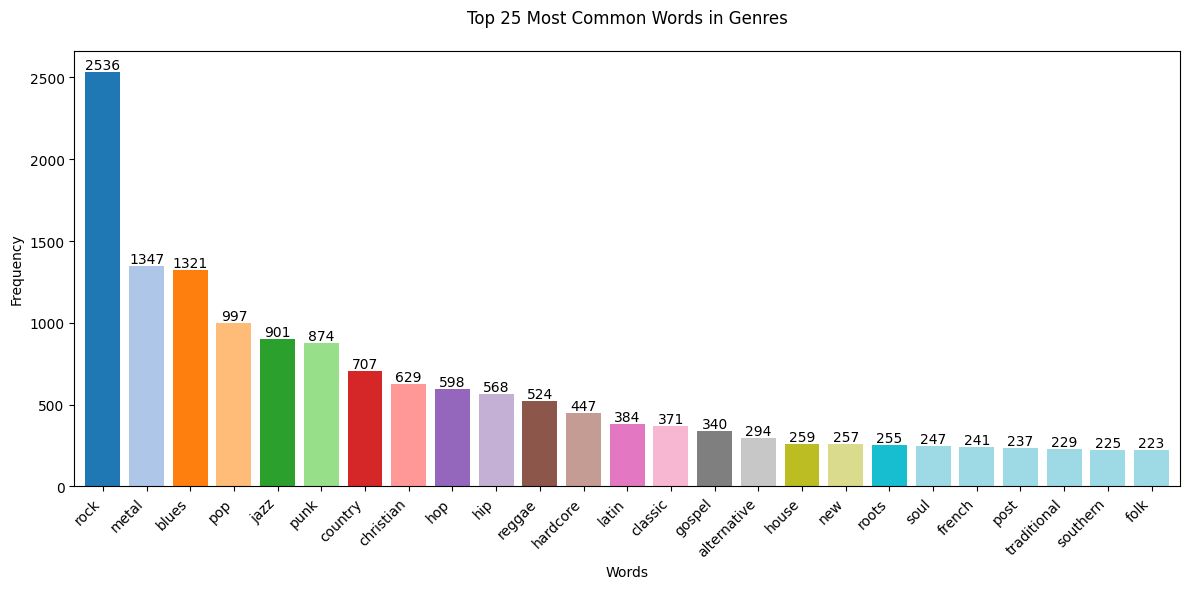

In [16]:
def analyze_genre_words(df, n_words=25):
    """
    Analyze the most common words in the genres column.
    Splits on both spaces and hyphens.
    
    Parameters:
    df : DataFrame containing the genres column
    n_words : Number of top words to display (default=30)
    """
    all_words = []
    
    for genre_list in df['genres'].dropna():    # iterate through every row
        if isinstance(genre_list, str):
            genre_list = eval(genre_list)
            
        for genre in genre_list:    # split by spaces and hyphens
            space_split = genre.split()
            for term in space_split:
                hyphen_split = term.split('-')
                all_words.extend(hyphen_split)
    
    all_words = [word.lower() for word in all_words] # convert to lowercase
    
    word_freq = pd.Series(all_words).value_counts() # count frequencies
    
    plt.figure(figsize=(12, 6))
    ax = word_freq.head(n_words).plot(
        kind='bar',
        color=plt.cm.tab20(np.arange(n_words)),  
        width=0.8
    )
    
    plt.title(f'Top {n_words} Most Common Words in Genres', pad=20)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    
    for i, v in enumerate(word_freq.head(n_words)):
        ax.text(
            i, v, str(v), 
            ha='center', va='bottom'
        )
    
    plt.tight_layout()
    
    print(f'\nTop {n_words} most common words in genres:')
    for word, count in word_freq.head(n_words).items():
        print(f"{word}: {count}")
    
    return word_freq

word_frequencies = analyze_genre_words(spotify_data)

#### Hot encode genres

In [17]:
def hot_encode_genre_words(df, word_list):
    """
    Create binary columns for each genre word in the word_list.
    Returns a dataframe with new columns indicating if each word appears in the genres.
    """
    df = df.copy()
       
    for word in word_list:
        df[word] = 0 # init columns with 0
    
    for idx, row in df.iterrows():  # iterate through rows
        genre_list = row['genres']
        if isinstance(genre_list, str):
            genre_list = eval(genre_list)
            
        words = []
        for genre in genre_list:
            space_split = genre.split()
            for term in space_split:
                words.extend(term.split('-'))
        
        words = [w.lower() for w in words]
        
        if 'hip' in words and 'hop' in words:   # special case for hip-hop
            words.append('hip-hop')
        
        for word in word_list:  # set binary values
            if word in words:
                df.at[idx, word] = 1
    
    return df

# define most common genres to encode
most_common_genres = [
    'rock',
    'pop',
    'blues',
    'metal',
    'hip-hop',
    'country',
    'punk',
    'jazz',
    'rap',
    'reggae',
    'folk',
    'soul',
    'latin',
    'dance',
    'indie',
    'classical'
]

spotify_data_encoded = hot_encode_genre_words(spotify_data, most_common_genres)

print('\nSample of encoded genres:')
print(spotify_data_encoded[most_common_genres].head())

print('\nTotal songs per genre:')
print(spotify_data_encoded[most_common_genres].sum().sort_values(ascending=False))


Sample of encoded genres:
   rock  pop  blues  metal  hip-hop  country  punk  jazz  rap  reggae  folk  \
0     0    1      0      0        0        0     0     0    0       0     0   
1     0    1      0      0        0        0     0     0    0       0     0   
2     0    0      0      0        0        0     0     0    0       0     0   
3     0    0      0      0        0        0     1     0    0       0     0   
4     1    0      0      0        0        0     0     1    0       0     0   

   soul  latin  dance  indie  classical  
0     0      0      0      0          0  
1     0      0      0      0          0  
2     0      0      0      0          0  
3     0      0      0      0          0  
4     0      0      0      0          0  

Total songs per genre:
rock         1644
pop           781
country       607
jazz          572
metal         551
blues         491
punk          453
hip-hop       363
latin         319
reggae        307
soul          196
folk          188
rap   

Reorder columns

In [18]:
new_column_order = [
    'title', 'artist', 'album', 'release_year', 'popularity', 'is_explicit', 'duration_seconds',
    'rock', 'pop', 'blues', 'metal', 'hip-hop', 'country', 'punk', 'jazz', 
    'rap', 'reggae', 'folk', 'soul', 'latin', 'dance', 'indie', 'classical',
    'album_cover', 'genres'
]

spotify_data_encoded = spotify_data_encoded[new_column_order]
display(spotify_data_encoded)
spotify_data_encoded.info()

,title,artist,album,release_year,popularity,is_explicit,duration_seconds,rock,pop,blues,...,rap,reggae,folk,soul,latin,dance,indie,classical,album_cover,genres
0,Je sais que la Terre est plate,Raphaël,Je Sais Que La Terre Est Plate,2008,14,False,150,0,1,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b2739e6b95...,"['variété française', 'chanson', 'french pop',..."
1,On efface,Julie Zenatti,Comme vous...,2004,1,False,253,0,1,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b27398d445...,"['variété française', 'french pop', 'chanson']"
2,Howells Delight,Anonymous,The Best of the Baltimore Consort,2011,0,False,240,0,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b273ec785e...,"['medieval', 'chamber music', 'swedish ballads']"
3,Martha Served,I Hate Sally,Don't Worry Lady,2007,2,True,139,0,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b273e6d949...,"['hardcore punk', 'screamo']"
4,Liquid Time,Brand X,X Communication : Trilogy II,1992,5,False,279,1,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b27393de17...,"['jazz fusion', 'progressive rock', 'art rock'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,Gateway,Dean Evenson,Ascension to Tibet,1995,1,False,204,0,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b273ac6328...,['new age']
6984,Go And Wash Those Dirty Feet,Johnny Horton,Done Rovin',2024,2,False,138,0,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b27306c443...,"['rockabilly', 'honky tonk']"
6985,One About Heaven,Brent Lamb,Reflections Of A Simple Man,2005,0,False,237,1,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b273645e58...,"['christian country', 'southern gospel', 'ccm'..."
6986,October,U2,The Best Of 1980 - 1990,1998,37,False,140,1,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b273ba1710...,['rock']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6988 entries, 0 to 6987
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             6988 non-null   object
 1   artist            6988 non-null   object
 2   album             6988 non-null   object
 3   release_year      6988 non-null   int64 
 4   popularity        6988 non-null   int64 
 5   is_explicit       6988 non-null   bool  
 6   duration_seconds  6988 non-null   int64 
 7   rock              6988 non-null   int64 
 8   pop               6988 non-null   int64 
 9   blues             6988 non-null   int64 
 10  metal             6988 non-null   int64 
 11  hip-hop           6988 non-null   int64 
 12  country           6988 non-null   int64 
 13  punk              6988 non-null   int64 
 14  jazz              6988 non-null   int64 
 15  rap               6988 non-null   int64 
 16  reggae            6988 non-null   int64 
 17  folk          

#### Save to csv

In [19]:
# spotify_data_encoded.to_csv('../data/clean/spotify_data_encoded.csv', index=False)